## Vehicle Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner

Dataset : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho


In [1]:
# Import statements

import pandas as pd
import numpy as np
import re as re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pickle

plt.style.use('dark_background')

In [2]:
# Read CSV
FILE_LOC = "car-details.csv" 
df = pd.read_csv(FILE_LOC)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Shape of data
df.shape

(8128, 13)

In [4]:
# See null values in column
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
# Drop null values
df.dropna(inplace=True)
print("Shape : ", df.shape)
df.isnull().sum()


Shape :  (7906, 13)


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
# See the head values
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
# Calculate Age of Car 
df['age'] = 2020 - df['year']

# Drop cols which are not needed
df.drop(['name','year'], axis=1, inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,14
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,13


In [8]:
# function to extract numeric value 
def extractVal(text):
    if not (text and text.strip()):
        raise ValueError('Missing or empty value')
    return float(re.findall(r'\d+\.*\d*', text)[0])

print(extractVal('190Nm@ 2000rpm'))
print(extractVal('22.4 kgm at 1750-2750rpm'))
print(extractVal('12.7@ 2,700(kgm@ rpm)'))
print(extractVal('1497 CC'))
print(extractVal('23.0 kmpl'))

190.0
22.4
12.7
1497.0
23.0


In [9]:
# Update fields with unit values - torque, max_power, engine, mileage
cols = ['torque', 'max_power', 'engine', 'mileage']

for col in cols:
    df[col] = df[col].apply(extractVal)
    
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,6
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0,14
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0,10
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0,13


In [10]:
# Describe dataset

df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,selling_price,km_driven,mileage,engine,max_power,torque,seats,age
count,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00
mean,649813.72,69188.66,19.42,1458.71,91.59,168.29,5.42,6.02
std,813582.75,56792.30,4.04,503.89,35.75,97.31,0.96,3.86
min,29999.00,1.00,0.00,624.00,32.80,4.80,2.00,0.00
25%,270000.00,35000.00,16.78,1197.00,68.05,101.00,5.00,3.00
50%,450000.00,60000.00,19.30,1248.00,82.00,154.90,5.00,5.00
75%,690000.00,95425.00,22.32,1582.00,102.00,202.00,5.00,8.00
max,10000000.00,2360457.00,42.00,3604.00,400.00,789.00,14.00,26.00


In [11]:
# find unique values of categorical columns - fuel, seller_type, transmission, owner

print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [12]:
# One hot encoding with pandas library

df = pd.get_dummies(df, drop_first=True)
df.head()

,selling_price,km_driven,mileage,engine,max_power,torque,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,190.0,5.0,6,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,250.0,5.0,6,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497.0,78.00,12.7,5.0,14,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396.0,90.00,22.4,5.0,10,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,11.5,5.0,13,0,0,1,1,0,1,0,0,0,0


In [13]:
# Find correlations

df.corr()

,selling_price,km_driven,mileage,engine,max_power,torque,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.619792,0.041617,-0.412302,0.204831,-0.035978,-0.195074,-0.386151,0.032779,-0.590269,-0.073601,-0.178786,0.116081,-0.115113
km_driven,-0.222158,1.000000,-0.172980,0.206031,-0.038159,-0.003322,0.227259,0.428548,0.271662,0.023095,-0.274460,0.202851,-0.083181,0.201186,0.089244,0.209913,-0.024168,0.148795
mileage,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.171132,-0.451700,-0.328544,0.060256,-0.013924,-0.074927,0.011862,-0.036248,0.178986,-0.072118,-0.101811,-0.015644,-0.097455
engine,0.455682,0.206031,-0.576408,1.000000,0.703975,0.628868,0.611103,-0.018263,0.507383,-0.056681,-0.491189,-0.132215,0.038690,-0.283206,-0.006433,0.020809,0.013954,-0.004743
max_power,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.770206,0.191999,-0.226598,0.304787,-0.060175,-0.286090,-0.286493,0.026493,-0.541870,-0.037283,-0.085206,0.049734,-0.054249
torque,0.619792,-0.003322,-0.171132,0.628868,0.770206,1.000000,0.274470,-0.289456,0.614846,-0.068263,-0.595288,-0.209045,-0.052129,-0.375916,-0.059453,-0.082300,0.028051,-0.085448
seats,0.041617,0.227259,-0.451700,0.611103,0.191999,0.274470,1.000000,0.007923,0.354764,-0.028949,-0.345399,0.081197,-0.028106,0.072722,0.007845,0.033751,-0.010921,0.005175
age,-0.412302,0.428548,-0.328544,-0.018263,-0.226598,-0.289456,0.007923,1.000000,-0.037536,0.059887,0.034351,0.243729,-0.100385,0.249002,0.205631,0.317328,-0.032661,0.271317
fuel_Diesel,0.204831,0.271662,0.060256,0.507383,0.304787,0.614846,0.354764,-0.037536,1.000000,-0.072800,-0.978020,0.003567,-0.140763,0.025579,-0.009021,0.051721,-0.017362,-0.007567
fuel_LPG,-0.035978,0.023095,-0.013924,-0.056681,-0.060175,-0.068263,-0.028949,0.059887,-0.072800,1.000000,-0.059739,0.025092,-0.011697,0.025967,0.003946,0.013442,-0.001678,0.021268


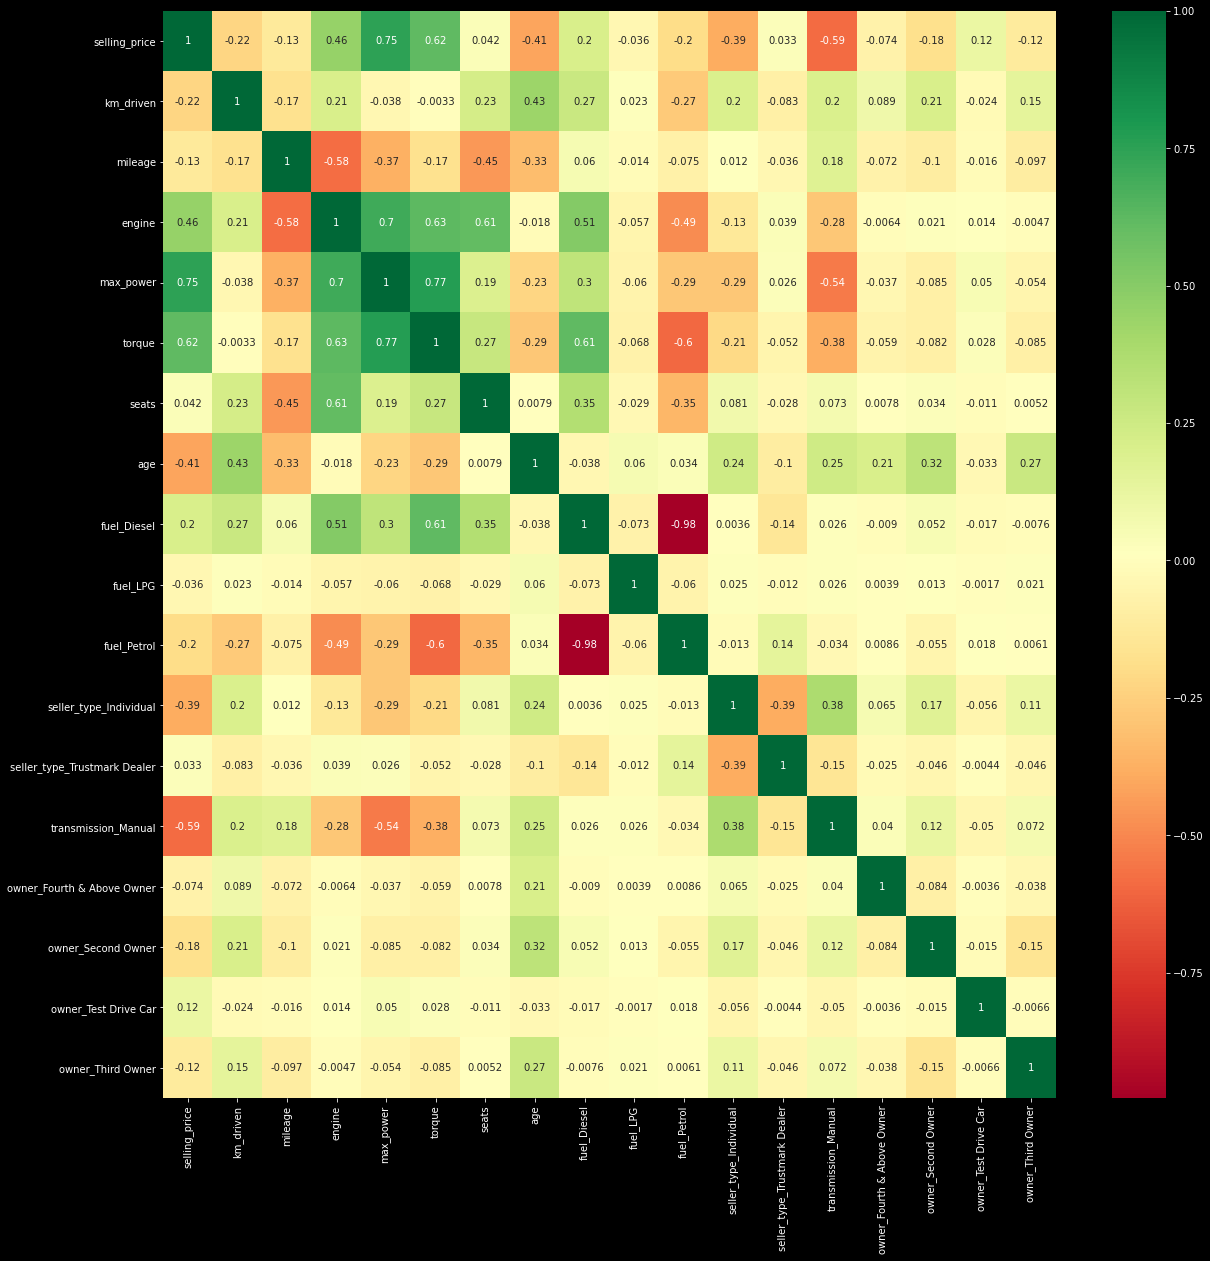

In [14]:
# Visualize correlations

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
df.head()

,selling_price,km_driven,mileage,engine,max_power,torque,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,190.0,5.0,6,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,250.0,5.0,6,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497.0,78.00,12.7,5.0,14,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396.0,90.00,22.4,5.0,10,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,11.5,5.0,13,0,0,1,1,0,1,0,0,0,0


In [16]:
# Split Input and output 

X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [17]:
X.head()

,km_driven,mileage,engine,max_power,torque,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,23.40,1248.0,74.00,190.0,5.0,6,1,0,0,1,0,1,0,0,0,0
1,120000,21.14,1498.0,103.52,250.0,5.0,6,1,0,0,1,0,1,0,1,0,0
2,140000,17.70,1497.0,78.00,12.7,5.0,14,0,0,1,1,0,1,0,0,0,1
3,127000,23.00,1396.0,90.00,22.4,5.0,10,1,0,0,1,0,1,0,0,0,0
4,120000,16.10,1298.0,88.20,11.5,5.0,13,0,0,1,1,0,1,0,0,0,0


In [18]:
Y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [19]:
# Feature importance
model = ExtraTreesRegressor()
model.fit(X, Y)
print(model.feature_importances_)

[4.75747372e-02 1.80969493e-02 6.36010497e-02 2.78267239e-01
 1.16522087e-01 1.04492875e-02 1.56071409e-01 1.16616924e-02
 6.31349264e-06 1.03591412e-02 2.05103243e-02 9.23997596e-04
 2.55443252e-01 2.13045540e-04 6.25865929e-03 3.42690187e-03
 6.13914493e-04]


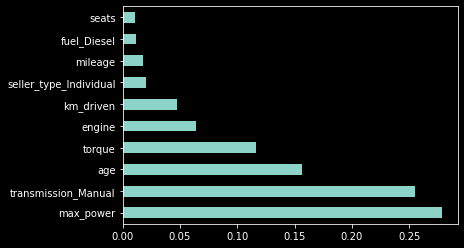

In [20]:
# Plot feature importance graph
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
# Split training and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [22]:

RandomForestRegressor()
# Hyperparameter Range

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 10)]

# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Tune the model

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=344, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=None 
[CV]  n_estimators=344, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=None, total=   2.4s
[CV] n_estimators=344, min_samples_split=10,

[CV]  n_estimators=711, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=15, total=   2.0s
[CV] n_estimators=711, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=15 
[CV]  n_estimators=711, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=15, total=   2.0s
[CV] n_estimators=711, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=15 
[CV]  n_estimators=711, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=15, total=   2.0s
[CV] n_estimators=711, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=15 
[CV]  n_estimators=711, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=15, total=   2.0s
[CV] n_estimators=711, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=15 
[CV]  n_estimators=711, min_samples_split=15, min_samples_leaf=2, max_features=log2, max_depth=15, total=   2.0s
[CV] n_estimators=1200, min_samples_split=5

In [ ]:
# Best params
rf_random.best_params_

In [ ]:
# Best score
rf_random.best_score_

In [ ]:
# predict all X cols
predictions=rf_random.predict(X_test)

In [ ]:
# plot difference 
sns.distplot(y_test-predictions)

In [ ]:
# Scatter plot
plt.scatter(y_test,predictions)

In [ ]:
# Evaluate error

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
# Store model locally

# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)